## 웹 스크래핑 실습 및 csv 파일 작성과 이미지 스크래핑

In [30]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

In [31]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try:
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read() , 'html.parser' , from_encoding='utf-8')

- 점수(별점), 리뷰제목, 작성자닉네임, 작성날짜, 리뷰내용
- 감정분석(VADER) - NLTK
- good +0.1 , awful -0.1 , perfect +0.2
- 문장에서 저런 단어가 추출되면 나올 때마다 점수를 더하고 빼서 점수가 양수면 긍정, 음수면 부정으로 평가해보자.

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\i\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
review_list = soup.find_all('div' , {'class' : 'imdb-user-review'})

In [33]:
review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

In [133]:
data = []
# 워드클라우드 띄워줄 때 쓸 모든 리뷰 텍스트를 합친 문자열
sum_review = ''
for review in review_list :
    score = review.find('span').get_text().replace('\n', '')
    title = review.find('a').get_text().replace('\n', '')
    writer = review.find('span' , {'class' : 'display-name-link'}).get_text()
    date = review.find('span' ,  {'class' : 'review-date'}).get_text()
    content = review.find('div', {'class' : 'text show-more__control'}).get_text()
    
    sum_review = sum_review+content
    
#    print(content)
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
    # polarity_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산해주고 종합 점수[compound]를 반환
    for sent in lines_list :
        print(sent)
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    sum1 = str(sum/len(lines_list))
    
    data.append([score, title, writer, date, content, sum1])
        

    

This movie portrays a villain that by far has been the best out of all the other Marvel antagonists.
It shows his personal conflicts, his purpose, as well as his cruelty.
The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.
This film is way better than endgame!
The actions better
The writings better
The dialogues better
The cgi is better
More shocks and more emotional.
Watching both in the cinema , the reactions to this in cinema was unbelievable compared to endgame.
Dont get me wrong endgame is good but to say its the best marvel film is jus marvel fan boys being stupid.
I just dont see how people are saying endgame is the best marvel film when theres clearly other marvel films better than it!
But trust me this is the film that changed the mcu , lol maybe it because i wanted them to lose because thanos is badass!!!!!!!!!!!!!
!
..but still 10/10.
Or 9.5 if its possible.The MCU has been very consistent in their filmmaking and I am happy t

In [134]:
data

[['9/10',
  ' Great',
  'MR_Heraclius',
  '23 February 2020',
  'This movie portrays a villain that by far has been the best out of all the other Marvel antagonists. It shows his personal conflicts, his purpose, as well as his cruelty. The heroes of this film are overshadowed by this, but the ending really makes a mark on the audience.',
  '-0.06573333333333331'],
 ['10/10',
  ' Way better than endgame',
  'michaelhowell12',
  '2 September 2019',
  'This film is way better than endgame!\nThe actions better\nThe writings better\nThe dialogues better\nThe cgi is better\nMore shocks and more emotional.\nWatching both in the cinema , the reactions to this in cinema was unbelievable compared to endgame. Dont get me wrong endgame is good but to say its the best marvel film is jus marvel fan boys being stupid.\nI just dont see how people are saying endgame is the best marvel film when theres clearly other marvel films better than it!\nBut trust me this is the film that changed the mcu , lol m

In [92]:
#     # 점수
#     span = soup.findAll("span", {"class" : "rating-other-user-rating"})
#     rating = [element.text.strip() for element in span]
#     print(rating)

#     # 리뷰 제목
#     title = soup.findAll("a", {"class" : "title"})
#     review_title = [element.text.strip() for element in title]
#     print(review_title)

#     # 작성자 닉네임
#     name = soup.findAll("span", {"class" : "display-name-link"})
#     user_name = [element.text for element in name]
#     print(user_name)

#     # 작성 날짜
#     date = soup.findAll("span", {"class" : "review-date"})
#     write_date = [element.text for element in date]
#     print(write_date)

#     # 리뷰 내용
#     review = soup.findAll("div", {"class" : "text show-more__control"})
#     write_review = [element.text for element in review]
#     print(write_review)


#     print(len(rating))
#     print(len(user_name))
#     print(len(review_title))
#     print(len(write_date))
#     print(len(write_review))

['9/10', '10/10', '10/10', '10/10', '10/10', '10/10', '10/10', '10/10', '10/10', '9/10', '9/10', '9/10', '10/10', '10/10', '9/10', '10/10', '10/10', '10/10', '10/10', '10/10', '10/10', '9/10', '10/10', '10/10', '8/10']
['Great', 'Way better than endgame', "IT'S NOT A MASTERPIECE..", 'Somehow they pulled this off', 'Unlike anything ever done in the history of cinema', 'This movie will blow your mind and break your heart - and make you desperate to go back for more. Brave, brilliant and better than it has any right to be.', 'Best movie Avengers infinity war 2018', 'Worth the wait, believe the hype', 'A Summer Film That IS Even Better Than The Hype', 'Excellent Film', 'Breathtaking', 'the final battle in this movie was great and very enjoyable and it is only topped by its sequel which offered a truly EPIC battle of APOCALYPTIC proportions', "The amount of people that don't understand the movie is astonishing", 'Adventure Awaits', 'Great movie', 'The best marvel film!', 'Superhero odyssey'

In [135]:
# with open('./data/service_imdb_wordcloud.csv', 'w' , encoding='utf-8') as file:
#     file.write('score, title, writer, data, content, sum \n')
    
#     # data를 반복해서 저장
    
#     for idx in data :
#         file.write("{},{},{},{},{},{}\n".format(idx[0],idx[1],idx[2],idx[3],idx[4],idx[5]))
    

PermissionError: [Errno 13] Permission denied: './data/service_imdb_wordcloud.csv'

In [152]:
import pandas as pd

reviewDF = pd.DataFrame(data)
reviewDF

,0,1,2,3,4,5
0,9/10,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.06573333333333331
1,10/10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.5872857142857143
2,10/10,IT'S NOT A MASTERPIECE..,ProfGenki,31 August 2020,..but still 10/10. Or 9.5 if its possible.The ...,0.3859333333333333
3,10/10,Somehow they pulled this off,Jesper2801,26 April 2018,I consider myself a big comic book marvel fan....,0.22276249999999997
4,10/10,Unlike anything ever done in the history of c...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012816666666666652
5,10/10,This movie will blow your mind and break your...,shawneofthedead,25 April 2018,"Over the past decade, Marvel has earned itself...",0.12366538461538462
6,10/10,Best movie Avengers infinity war 2018,udit-mehra-631,12 July 2020,Best movie Avengers infinity war 2018 I was am...,0.29388
7,10/10,"Worth the wait, believe the hype",ubtgkse,29 July 2020,Avengers infinity war is a masterpiece in ever...,0.49345
8,10/10,A Summer Film That IS Even Better Than The Hype,garethvk,24 April 2018,Summer movies often hype themselves as spectac...,0.2901666666666667
9,9/10,Excellent Film,kevintgeisler,19 June 2018,I was amazed to see so many negative reviews; ...,0.27908


In [146]:
score = reviewDF[0] 
title = reviewDF[1] 
writer = reviewDF[2] 
date = reviewDF[3] 
content = reviewDF[4] 
sum_words_rate = reviewDF[5]

In [153]:
print(reviewDF[0])

0      9/10
1     10/10
2     10/10
3     10/10
4     10/10
5     10/10
6     10/10
7     10/10
8     10/10
9      9/10
10     9/10
11     9/10
12    10/10
13    10/10
14     9/10
15    10/10
16    10/10
17    10/10
18    10/10
19    10/10
20    10/10
21     9/10
22    10/10
23    10/10
24     8/10
Name: 0, dtype: object


In [151]:
reviewDF = pd.DataFrame({'score' : score , 'title' : title , 'writer' : writer, 'date' : date, 'content' : content, 'sum_words_rate' : sum_words_rate})
reviewDF

,score,title,writer,date,content,sum_words_rate
0,9/10,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.06573333333333331
1,10/10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.5872857142857143
2,10/10,IT'S NOT A MASTERPIECE..,ProfGenki,31 August 2020,..but still 10/10. Or 9.5 if its possible.The ...,0.3859333333333333
3,10/10,Somehow they pulled this off,Jesper2801,26 April 2018,I consider myself a big comic book marvel fan....,0.22276249999999997
4,10/10,Unlike anything ever done in the history of c...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012816666666666652
5,10/10,This movie will blow your mind and break your...,shawneofthedead,25 April 2018,"Over the past decade, Marvel has earned itself...",0.12366538461538462
6,10/10,Best movie Avengers infinity war 2018,udit-mehra-631,12 July 2020,Best movie Avengers infinity war 2018 I was am...,0.29388
7,10/10,"Worth the wait, believe the hype",ubtgkse,29 July 2020,Avengers infinity war is a masterpiece in ever...,0.49345
8,10/10,A Summer Film That IS Even Better Than The Hype,garethvk,24 April 2018,Summer movies often hype themselves as spectac...,0.2901666666666667
9,9/10,Excellent Film,kevintgeisler,19 June 2018,I was amazed to see so many negative reviews; ...,0.27908


In [ ]:
 {'score' : score , 'title' : title , 'writer' : writer, 'date' : date, 'content' : content, 'sum' : sum}
    
    reviewDF = pd.DataFrame({0 : 'score' , 1 : 'title' , 2 : 'writer', 3 : 'date', 4 : 'content', 5 : 'sum'})

In [127]:
score_result = [score]

print(score_result)

title_result = []
writer_result = []
date_result = []
content_result = []
sum_review_result = []

['8/10']


In [113]:
print(len(score_result))
print(len(title_result))
print(len(writer_result))
print(len(date_result))
print(len(content_result))
print(len(sum_review_result))

0
0
0
0
0
0


In [105]:
# df = pd.read_csv('./data/service_imdb_wordcloud.csv', encoding='utf-8')
# df

NameError: name 'pd' is not defined

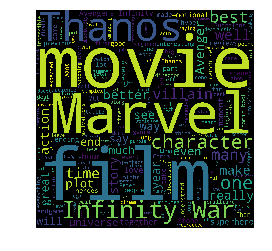

In [111]:
wordcloud = WordCloud(
    width=4000, 
    height=4000, 
    stopwords=set(STOPWORDS)
    ).generate(sum_review)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 자연어 처리 기초
#### 자연어 처리 엔진
- 꼬고마
- 한나눔
- 트위터

In [34]:
from konlpy.tag import Kkma

In [35]:
kkoma = Kkma()

In [37]:
kkoma.nouns('한국어 문장 분석을 시작합니다. 재미있어요~~')

['한국어', '문장', '분석']

In [39]:
kkoma.sentences('한국어 문장 분석을 시작합니다. 재미있어요~~')

['한국어 문장 분석을 시작합니다.', '재미있어요~~']

In [40]:
kkoma.pos('한국어 문장 분석을 시작합니다. 재미있어요~~')

[('한국어', 'NNG'),
 ('문장', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

- 워드클라우드

In [44]:
from wordcloud import WordCloud, STOPWORDS

In [45]:
import numpy as np 
from PIL import Image

In [47]:
text = open('./data/07. alice.txt').read()

In [48]:
text

'癤풮roject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what i

In [64]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))

In [65]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

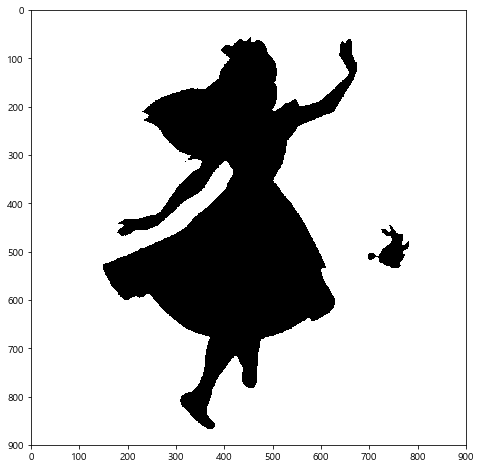

In [69]:
# 앨리스 그림 모양
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.show()

In [70]:
sw = set(STOPWORDS)
sw.add('said')
wc = WordCloud(background_color='white' , max_words=2000 , mask=alice_mask , stopwords = sw)

In [71]:
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11475

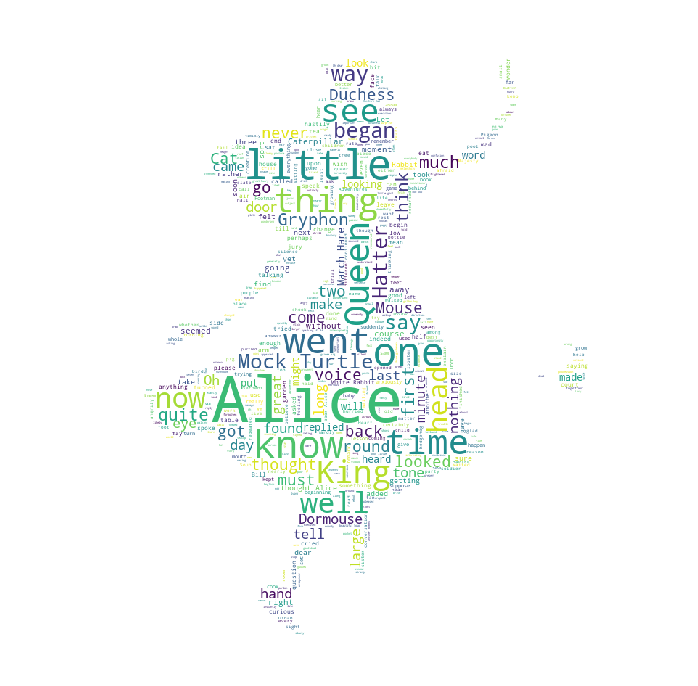

In [73]:
# 앨리스 그림 모양
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [91]:
a = [1, 2, 3, 4]
b = [10, 10, 10]

a.extend(b)
a

print(a)
a[4]

[1, 2, 3, 4, 10, 10, 10]


10

In [90]:
a = [1, 2, 3, 4]
b = [10, 10, 10]

a.append(b)
print(a)
a[4]

[1, 2, 3, 4, [10, 10, 10]]


[10, 10, 10]